### [ Scatter(산점도) Plot 살펴보기 ]
- 용도 : 2개 이상의컬럼들의 관계 정도를 시각화 하는 그래프
- corr()

(1) 모듈 로딩 <hr>

In [74]:
import pandas as pd
import numpy as np

In [75]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals = 1)
    return v

df = pd.DataFrame([(.2, .3), (.0, .6), (.6, .0), (.2, .1)], columns = ['dogs', 'cats'])
df

,dogs,cats
0,0.2,0.3
1,0.0,0.6
2,0.6,0.0
3,0.2,0.1


In [76]:
df.corr(method = histogram_intersection)

,dogs,cats
dogs,1.0,0.3
cats,0.3,1.0


In [77]:
df.corr()

,dogs,cats
dogs,1.000000,-0.851064
cats,-0.851064,1.000000


In [78]:
df = pd.DataFrame([(1, 1), (2, np.nan), (np.nan, 3), (4, 4)], columns = ['dogs', 'cats'])
df

,dogs,cats
0,1.0,1.0
1,2.0,NaN
2,NaN,3.0
3,4.0,4.0


In [79]:
df.corr(numeric_only = True, min_periods = 2)

,dogs,cats
dogs,1.0,1.0
cats,1.0,1.0


(2) 데이터 준비 <hr>

In [80]:
file = '../DATA/auto-mpg.csv'

(3) 데이터 저장 => CSV ---> DataFrame <hr>

In [81]:
mpgDF = pd.read_csv(file, sep ='\s+', names = ['mpg', 'cylinders', 'displacement', 'horsepower',
                                               'weight', 'acceleration', 'model year', 'origin',
                                               'car name'])

In [82]:
mpgDF.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


(4) 데이터 정보 확인

- 전체 데이터 간략 정보 확인 => info()

In [83]:
mpgDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


- 실제 데이터의 값의 종류 그 고유값 확인 => unique() / nunique()
    * 각 컬럼의 이상한 값 즉, 이상치 확인
    * 각 컬럼의 값의 종류 및 범위
    * 각 컬럼의 실제 데이터 타입 

In [84]:
for col in mpgDF.columns:
    print(f'[{col}] ==============')
    print(mpgDF[col].nunique(), mpgDF[col].unique(), sep = '\n', end = '\n\n')

[mpg] ==============
129
[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]

[cylinders] ==============
5
[8 4 6 3 5]

[displacement] ==============
82
[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96

In [85]:
# dropna 파라미터설정으로 컬럼의 결측치 데이터 수 확인가능
mpgDF['origin'].nunique(dropna = True), mpgDF['origin'].unique()

(3, array([1, 3, 2], dtype=int64))

In [86]:
mpgDF['origin'].unique()

array([1, 3, 2], dtype=int64)

(5) 데이터 전처리 <hr>
- 결측치 체크 => 꼭 NaN이 아닐 수 있음
- 중복값 체크
- 이상치 체크 => 컬럼의 범위를 벗어난 값, 잘못 입력된 값
- 데이터 표준화 => 자료형, 데이터 단위 일치
- 데이터 정규화 => 데이터의 크기 일치

(5-1) 결측치 체크 및 처리 ==> 이상한 값 즉 이상치 NaN으로 변환 후 처리

In [87]:
mpgDF.horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [88]:
mpgDF.horsepower.value_counts()

horsepower
150.0    22
90.00    20
88.00    19
110.0    18
100.0    17
         ..
61.00     1
93.00     1
148.0     1
152.0     1
82.00     1
Name: count, Length: 94, dtype: int64

In [89]:
mpgDF.horsepower.value_counts()['?']

6

In [90]:
mpgDF['horsepower'].replace('?', np.nan, inplace = True)

In [91]:
mpgDF.dropna(inplace = True)

In [92]:
mpgDF.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

(5-2) 데이터 표준화 => horsepower의 자료형을 실제 데이터와 일치

In [93]:
mpgDF.horsepower = mpgDF.horsepower.astype('float32')  # astype 메서드는 inplace 파라미터 없음

In [94]:
mpgDF.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float32
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

(5-2) 데이터 표준화 => 연속형 즉 수치 자료형을 범주형 자료형으로 변환
    - 40 ~ 230 범위 실수 수치값 ===> 저출력 / 중출력 / 고출력

In [95]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3)

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

In [96]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3, labels = ['A', 'B', 'C'])

['A', 'C', 'B', 'B', 'C', 'A']
Categories (3, object): ['A' < 'B' < 'C']

In [97]:
# retbins 파라미터로 구간 출력
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3, labels = ['초영아', '영아', '유아'], retbins = True)

(['초영아', '유아', '영아', '영아', '유아', '초영아']
 Categories (3, object): ['초영아' < '영아' < '유아'],
 array([0.994, 3.   , 5.   , 7.   ]))

In [98]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3, include_lowest = True, retbins = True)

([(0.993, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.993, 3.0]]
 Categories (3, interval[float64, right]): [(0.993, 3.0] < (3.0, 5.0] < (5.0, 7.0]],
 array([0.994, 3.   , 5.   , 7.   ]))

In [99]:
pd.cut(mpgDF.horsepower, bins = 3, labels = ['저마력', '중마력', '고마력'], retbins = True)

(0      중마력
 1      중마력
 2      중마력
 3      중마력
 4      중마력
       ... 
 393    저마력
 394    저마력
 395    저마력
 396    저마력
 397    저마력
 Name: horsepower, Length: 392, dtype: category
 Categories (3, object): ['저마력' < '중마력' < '고마력'],
 array([ 45.816     , 107.33333333, 168.66666667, 230.        ]))

In [100]:
out, ret = pd.cut(mpgDF.horsepower, bins = 3, labels = ['저마력', '중마력', '고마력'], retbins = True)
type(out), ret

(pandas.core.series.Series,
 array([ 45.816     , 107.33333333, 168.66666667, 230.        ]))

In [101]:
mpgDF['horsepower'] = out

In [102]:
mpgDF.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower      category
weight           float64
acceleration     float64
model year         int64
origin             int64
car name          object
dtype: object

In [103]:
s = pd.Series(list('abca'))
s

0    a
1    b
2    c
3    a
dtype: object

In [104]:
pd.get_dummies(s, dtype = 'int32')

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


(5-3) 데이터 표준화 => 범주형 ==> 연속형 / 수치화 변환 : One-Hot-Encoding 방식 

In [105]:
# pandas.get_dummies()
# mpgDF 예) origin 컬럼을 변환 ==> 1, 2, 3 범주형


In [106]:
mpgDF['origin'].replace({1 : 'USA', 2 : 'EU', 3 : 'JPN'}, inplace = True)

In [107]:
mpgDF['origin'] = mpgDF['origin'].astype('category')

In [108]:
mpgDF.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower      category
weight           float64
acceleration     float64
model year         int64
origin          category
car name          object
dtype: object

(6) 데이터 분석 <hr>
(6-1) 연비 mpg 컬럼과 관계가 가장 높은 컬럼

In [112]:
# 상관계수 수치화 확인
corrDF = mpgDF.corr(numeric_only = True)
corrDF['mpg'][1:]

cylinders      -0.777618
displacement   -0.805127
weight         -0.832244
acceleration    0.423329
model year      0.580541
Name: mpg, dtype: float64

In [116]:
corrDF['mpg'][1:].sort_values()

weight         -0.832244
displacement   -0.805127
cylinders      -0.777618
acceleration    0.423329
model year      0.580541
Name: mpg, dtype: float64

In [114]:
# 시각화로 연비 mpg 컬럼의 관계 확인
import matplotlib.pyplot as plt

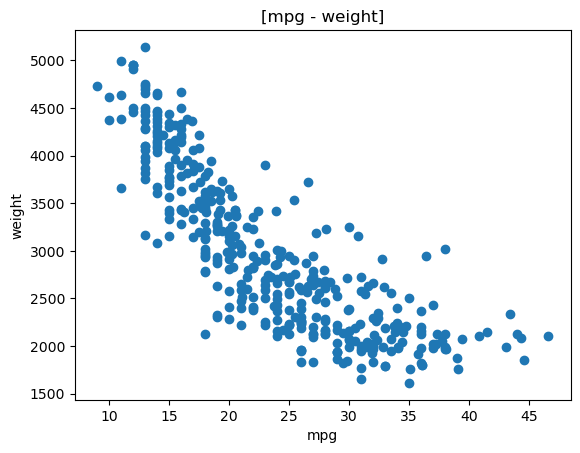

In [124]:
plt.scatter(mpgDF['mpg'], mpgDF['weight'])
plt.xlabel('mpg')
plt.ylabel('weight')
plt.title('[mpg - weight]')
plt.show()

In [122]:
def scatterplot(sr1, sr2):
    plt.scatter(sr1, sr2)
    plt.title(f'{sr1.name} - {sr2.name} [{round(corrDF["mpg"]["weight"], 2)}]')
    plt.xlabel(sr1.name)
    plt.ylabel(sr2.name)
    plt.show()

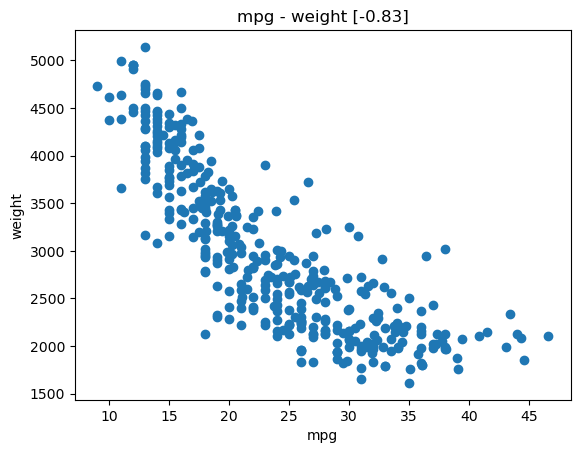

In [125]:
scatterplot(mpgDF['mpg'], mpgDF['weight'])

In [132]:
def printScatter(col1, col2):
    plt.scatter(mpgDF[col1], mpgDF[col2])
    plt.title(f'[{col1} - {col2} : {round(corrDF[col1][col2], 2)}]')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

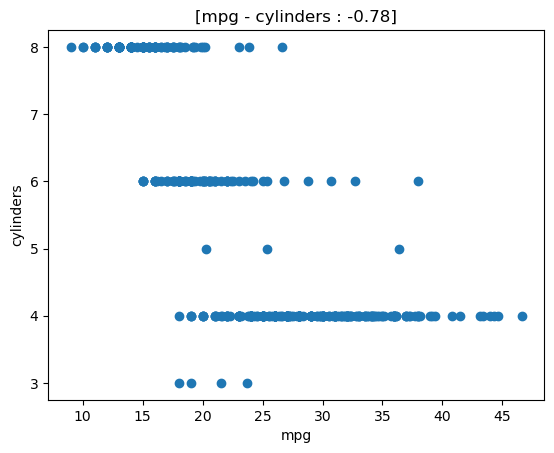

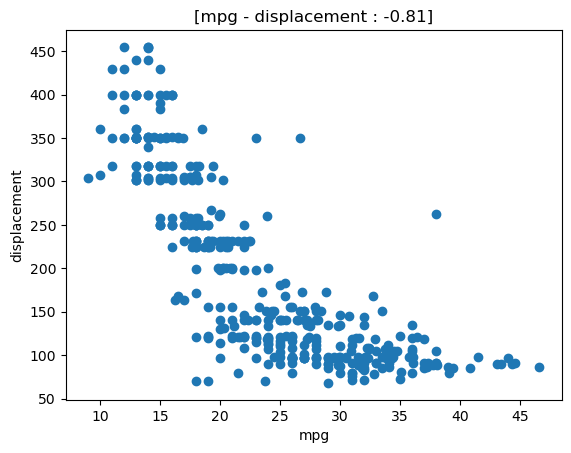

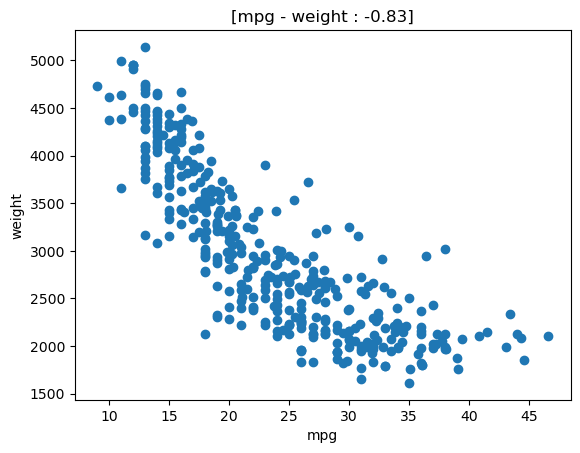

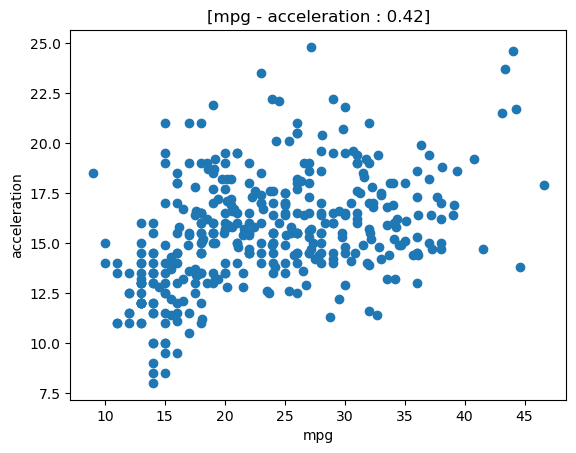

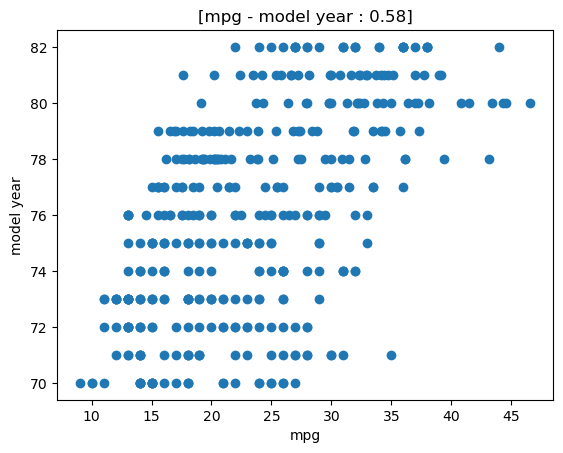

In [133]:
for col in corrDF.columns[1:]:
    printScatter('mpg', col)

(6-2) 자동차 제조사의 데이터 비율

In [139]:
originSR = mpgDF['origin'].value_counts()
originSR.index, originSR.values

(CategoricalIndex(['USA', 'JPN', 'EU'], categories=['EU', 'JPN', 'USA'], ordered=False, dtype='category', name='origin'),
 array([245,  79,  68], dtype=int64))

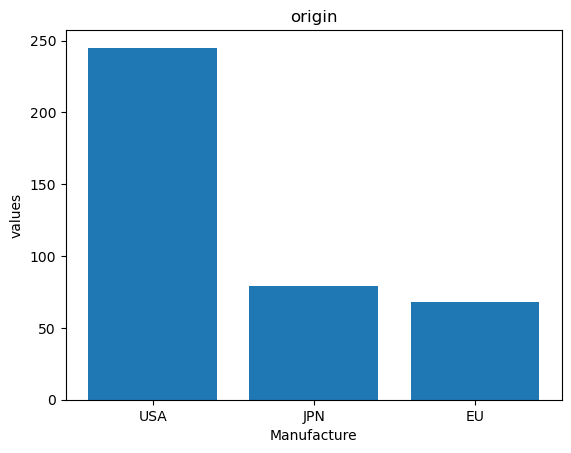

In [145]:
plt.bar(originSR.index, originSR.values)
plt.title('origin')
plt.xlabel('Manufacture')
plt.ylabel('values')
plt.show()

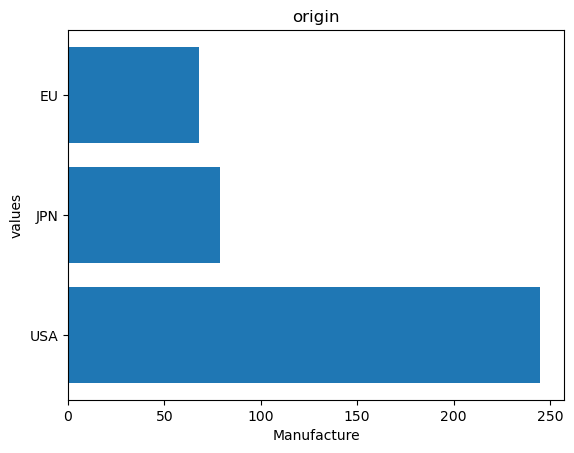

In [144]:
plt.barh(originSR.index, originSR.values)
plt.title('origin')
plt.xlabel('Manufacture')
plt.ylabel('values')
plt.show()

다중 그래프

- 방법 1) fig, ax = plt.subplots()
- 방법 2) plt.subplot(행, 열 ,인)  plt.subplot(3, 1, 1), plt.subplot(3, 1, 2), plt.subplot(3, 1, 3)

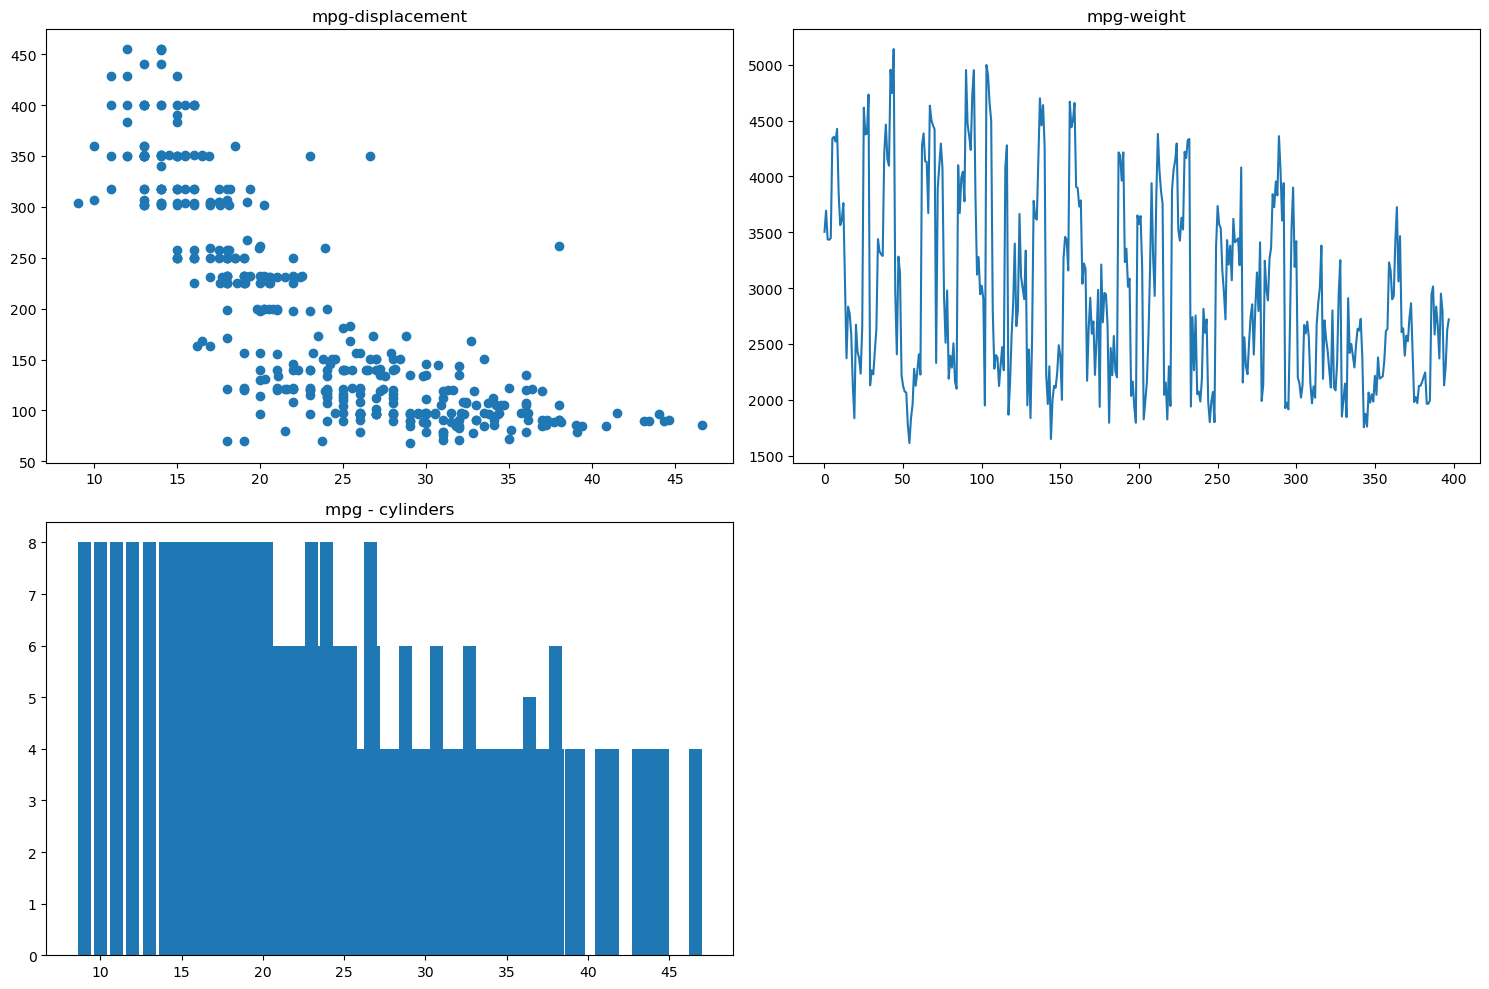

In [170]:
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
plt.scatter(mpgDF['mpg'], mpgDF['displacement'])
plt.title('mpg-displacement')

plt.subplot(2, 2, 2)
plt.plot(mpgDF['weight'])
plt.title('mpg-weight')

plt.subplot(2, 2, 3)
plt.bar(mpgDF['mpg'], mpgDF['cylinders'])
plt.title('mpg - cylinders')

plt.tight_layout()  # 그래프가 겹치는 것을 방지한다.
plt.show()

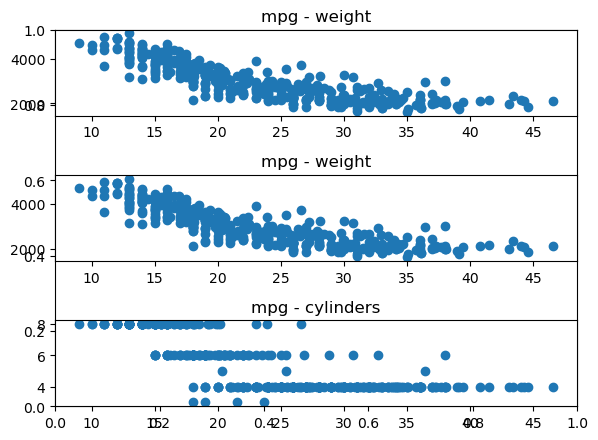

In [168]:
fig, ax = plt.subplots()

ax1 = fig.add_subplot(311)
ax1.scatter(mpgDF['mpg'], mpgDF['weight'])
ax1.set_title('mpg - weight')

ax2 = fig.add_subplot(312)
ax2.scatter(mpgDF['mpg'], mpgDF['weight'])
ax2.set_title('mpg - weight')

ax3 = fig.add_subplot(313)
ax3.scatter(mpgDF['mpg'], mpgDF['cylinders'])
ax3.set_title('mpg - cylinders')

plt.tight_layout()
plt.show()

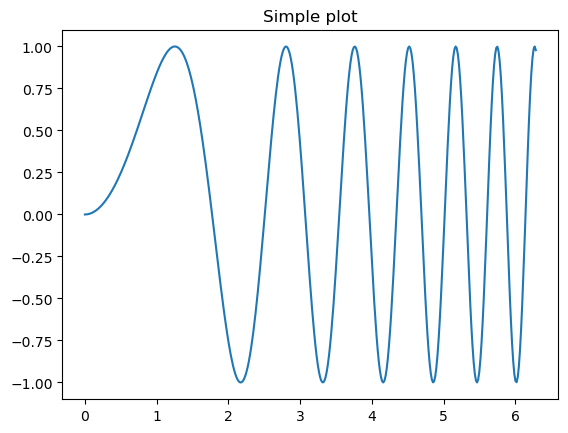

In [169]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')
plt.show()

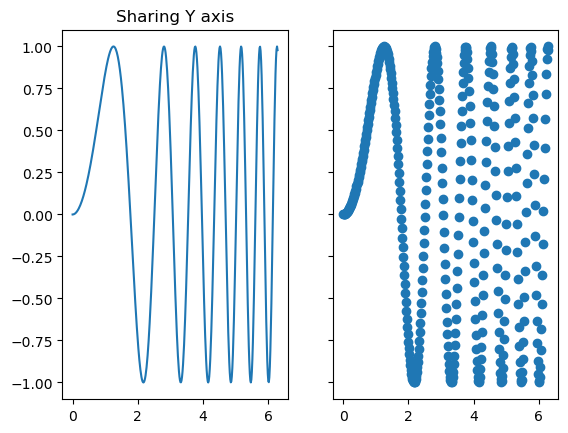

In [171]:
# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)  # sharey 매개변수는 y축 눈금값 공유 여부를 결정한다.
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)
plt.show()

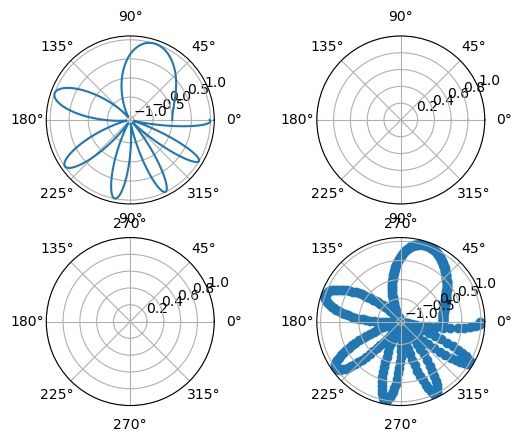

In [156]:
# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

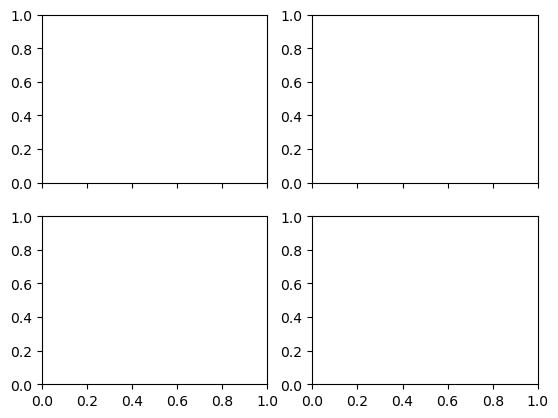

In [157]:
# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')  # sharex 매개변수는 x축 눈금값 공유 여부를 결정한다.

(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

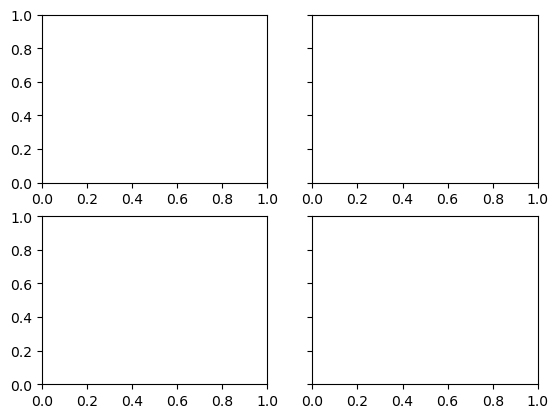

In [158]:
# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

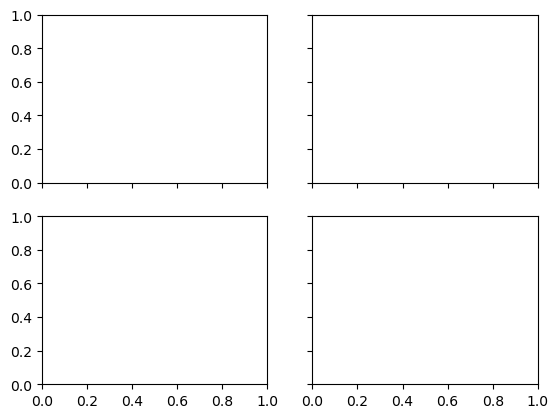

In [159]:
# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

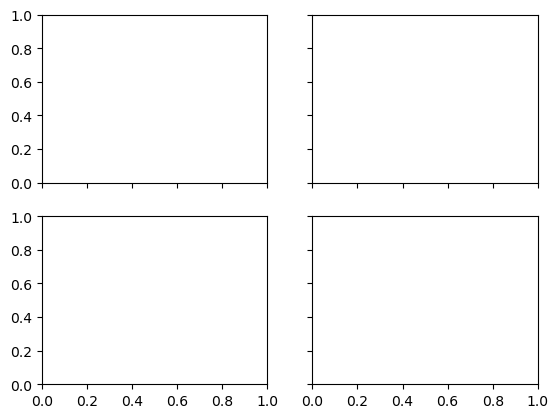

In [160]:
# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

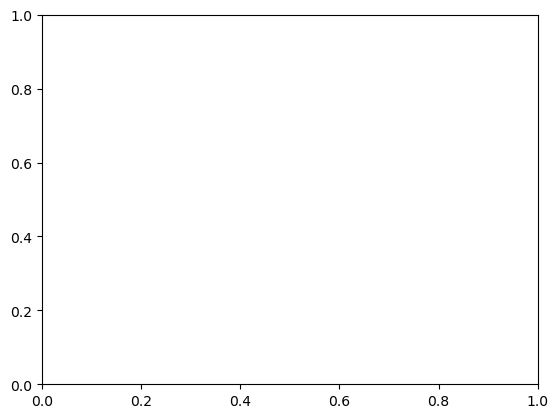

In [161]:
# Create figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax = plt.subplots(num=10, clear=True)